1. Data Exploration:
   
a. Load the dataset and perform exploratory data analysis (EDA).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf #for getting r**2 values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Test Data

In [ ]:
data_test=pd.read_csv("Titanic_test.csv")

In [ ]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#describing the data
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
#check the datatypes
data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data_test.shape    # 418 rows and 11 columns

(418, 11)

In [ ]:
#check the duplicate values
data_test.duplicated().sum()

0

In [ ]:
data_test.drop(columns='Cabin',inplace=True)

# Data Preprocessing

In [ ]:
#Handling the missing values
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#fill the missing values wuth the median
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].median())
data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].median())


In [ ]:
#again check the null values
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#drop the columns that are not required for the Visualization
data_test.drop(columns='PassengerId',inplace=True)
data_test.drop(columns='Name',inplace=True)
data_test.drop(columns='Ticket',inplace=True)


# Visualization


# Pairplot

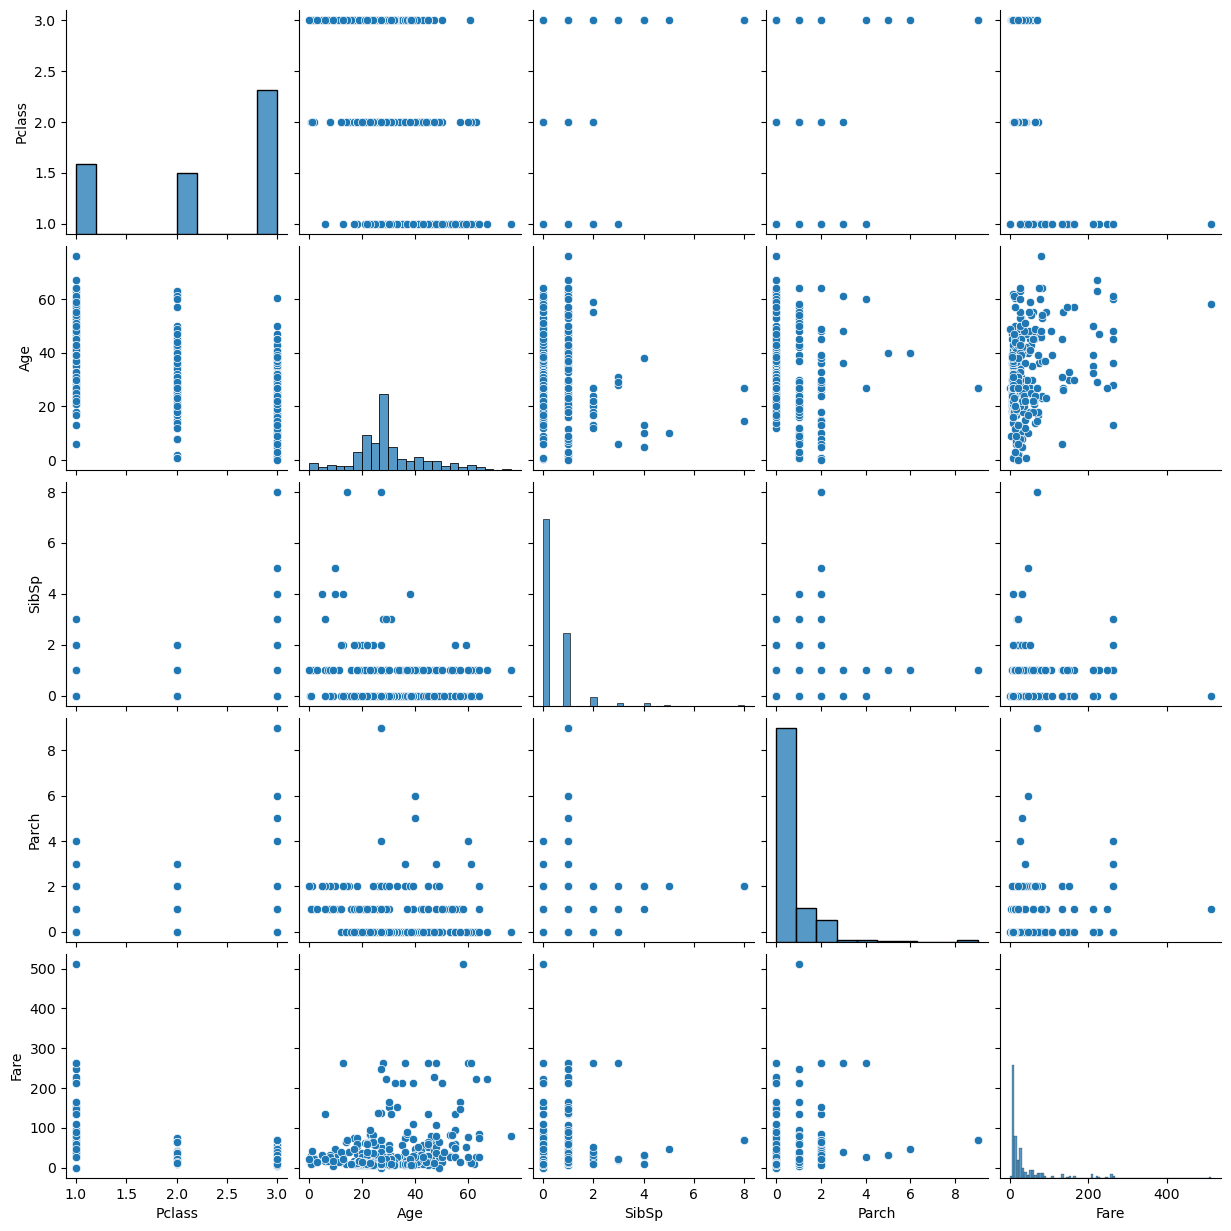

In [ ]:
sns.pairplot(data_test)

# Histogram

<Figure size 1500x500 with 0 Axes>

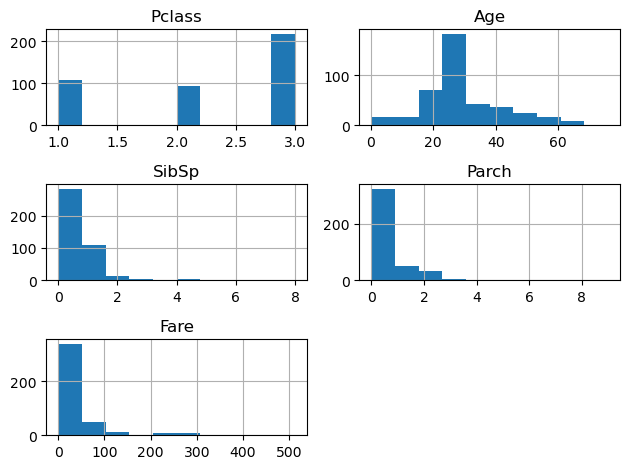

In [ ]:
plt.figure(figsize=(15,5))
data_test.hist()
plt.tight_layout()

# Boxplot

<Axes: >

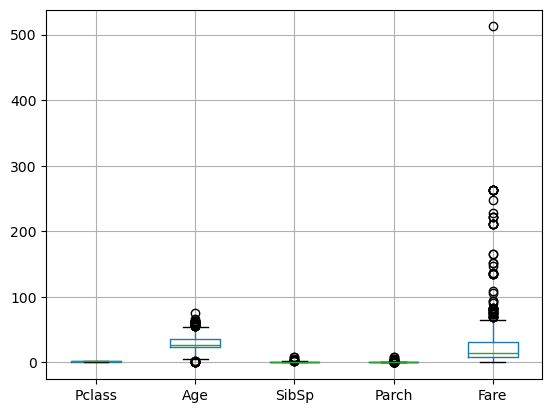

In [ ]:
data_test.boxplot()

In [ ]:
#detection of outliers
def outlier_Detection(data_test,columns):
    for col in columns:
        Q1=data_test[col].quantile(0.25)
        Q3=data_test[col].quantile(0.75)
        IQR=Q3-Q1
        Lower=Q1-1.5*IQR
        Upper=Q3+1.5*IQR
        data_test[col]=np.where(data_test[col]>Upper,Upper,np.where(data_test[col]<Lower,Lower,data_test[col]))
    return data_test

In [ ]:
outlier_Detection(data_test,['Age','SibSp','Parch','Fare'])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500,0.0,0.0,7.829200,Q
1,3,female,47.000,1.0,0.0,7.000000,S
2,2,male,54.875,0.0,0.0,9.687500,Q
3,3,male,27.000,0.0,0.0,8.662500,S
4,3,female,22.000,1.0,0.0,12.287500,S
...,...,...,...,...,...,...,...
413,3,male,27.000,0.0,0.0,8.050000,S
414,1,female,39.000,0.0,0.0,66.835988,C
415,3,male,38.500,0.0,0.0,7.250000,S
416,3,male,27.000,0.0,0.0,8.050000,S


<Axes: >

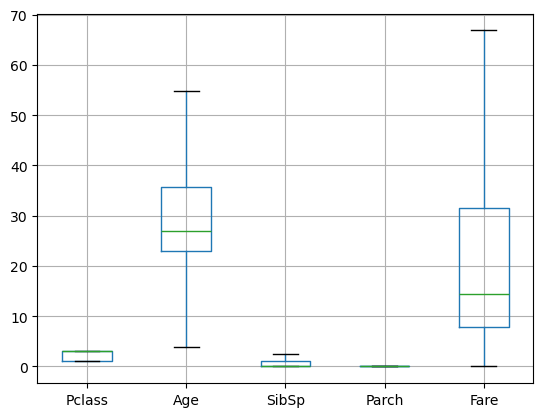

In [ ]:
#now plot the boxplot
data_test.boxplot()   # removing the all outliers

In [ ]:
#check the datatypes
data_test.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [ ]:
#sex and the embarked column has the object datatype convert it into the int data type by using the get dummies method

In [ ]:
data_test = pd.get_dummies(data=data_test, columns=['Sex','Embarked'],dtype = int)

In [ ]:
data_test.dtypes

Pclass          int64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Sex_female      int32
Sex_male        int32
Embarked_C      int32
Embarked_Q      int32
Embarked_S      int32
dtype: object

In [ ]:
#find out the correlation between the variables
correlation_matrix=data_test.corr()
correlation_matrix

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,-0.470951,-0.064610,-0.748755,-0.108615,0.108615,-0.318543,0.252608,0.120783
Age,-0.470951,1.000000,-0.043117,0.350319,0.002168,-0.002168,0.171541,-0.045909,-0.124021
SibSp,-0.064610,-0.043117,1.000000,0.331912,0.123638,-0.123638,0.022891,-0.128711,0.063669
Fare,-0.748755,0.350319,0.331912,1.000000,0.204543,-0.204543,0.319912,-0.235730,-0.133058
Sex_female,-0.108615,0.002168,0.123638,0.204543,1.000000,-1.000000,0.033684,0.115574,-0.105883
Sex_male,0.108615,-0.002168,-0.123638,-0.204543,-1.000000,1.000000,-0.033684,-0.115574,0.105883
Embarked_C,-0.318543,0.171541,0.022891,0.319912,0.033684,-0.033684,1.000000,-0.199786,-0.767375
Embarked_Q,0.252608,-0.045909,-0.128711,-0.235730,0.115574,-0.115574,-0.199786,1.000000,-0.474962
Embarked_S,0.120783,-0.124021,0.063669,-0.133058,-0.105883,0.105883,-0.767375,-0.474962,1.000000


# Heatmap

<Axes: >

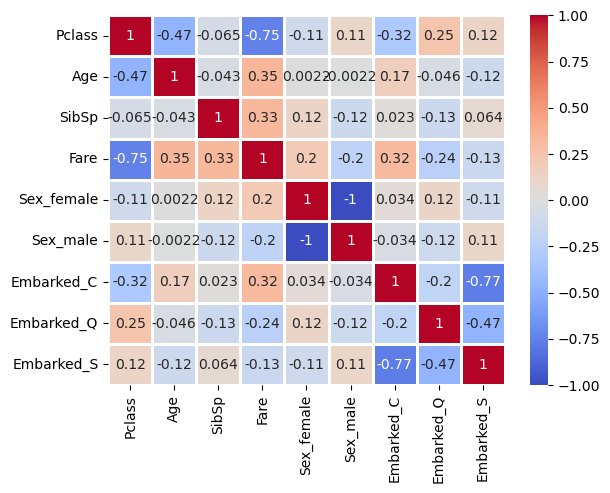

In [ ]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', linewidths=0.8)

# Model building doest not work on test data because the Survived column does not appear in the data set
#....then how can split data...so for the model building use the train data

## Train Data

# Train the model using the training data.

In [ ]:
#load the train data
data_train=pd.read_csv("Titanic_train.csv")

In [ ]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#describe the data
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_train.shape    # 891 rows and 12 columns

(891, 12)

In [ ]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Visualization

<Axes: >

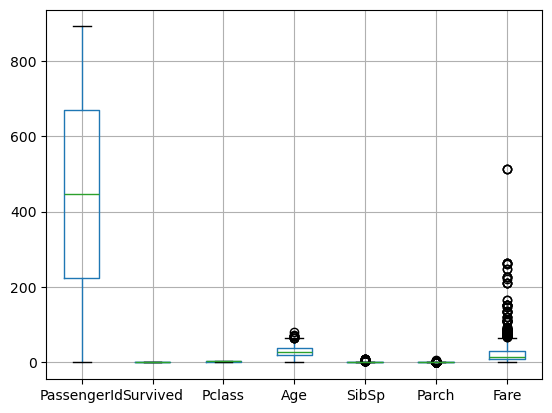

In [ ]:
data_train.boxplot()

<Figure size 1500x500 with 0 Axes>

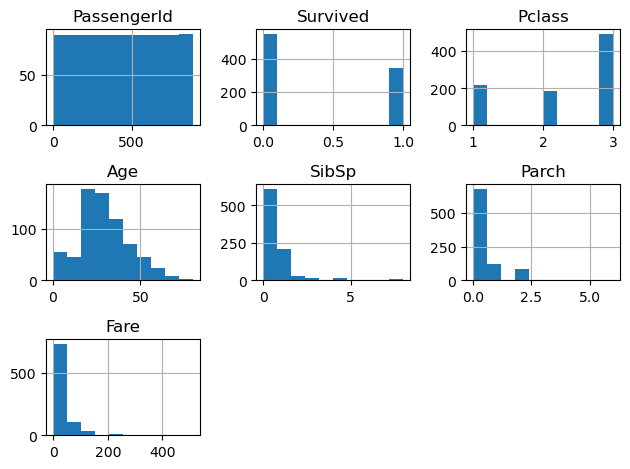

In [ ]:
plt.figure(figsize=(15,5))
data_train.hist()
plt.tight_layout()

# Data Preprocessing

In [ ]:
data_train= data_train.dropna()
data_train.shape

(183, 12)

In [ ]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
data = data_train.copy()
data_train['Age'].fillna(data_train['Age'].median(), inplace=True)

In [ ]:
data_train['Age'].fillna(data_train['Age'].median(),inplace=True)
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)
data_train['Fare'].fillna(data_train['Fare'].median(), inplace=True)

In [ ]:
categorical_columns = data_train.select_dtypes(include=['object']).columns
categorical_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_features = ['Sex', 'Embarked']

for feature in categorical_features:
    le = LabelEncoder()
    data_train[feature] = le.fit_transform(data_train[feature])
    label_encoders[feature] = le

In [ ]:
# Drop unnecessary columns
data_train.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Model building

In [ ]:
x = data_train.drop(columns=['Survived','PassengerId'])
y = data_train['Survived']

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,2
6,1,1,54.0,0,0,51.8625,2
10,3,0,4.0,1,1,16.7000,2
11,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...
871,1,0,47.0,1,1,52.5542,2
872,1,1,33.0,0,0,5.0000,2
879,1,0,56.0,0,1,83.1583,0
887,1,0,19.0,0,0,30.0000,2


In [ ]:
x.shape

(183, 7)

In [ ]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [ ]:
y.shape

(183,)

In [ ]:
# Split the dataset into training and testing sets
#20% data for the testing and the 80% data for the training
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=40)


In [ ]:
x_train,x_train

(     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 659       1    1  58.0      0      2  113.2750         0
 331       1    1  45.5      0      0   28.5000         2
 742       1    0  21.0      2      2  262.3750         0
 715       3    1  19.0      0      0    7.6500         2
 339       1    1  45.0      0      0   35.5000         2
 ..      ...  ...   ...    ...    ...       ...       ...
 75        3    1  25.0      0      0    7.6500         2
 275       1    0  63.0      1      0   77.9583         2
 782       1    1  29.0      0      0   30.0000         2
 27        1    1  19.0      3      2  263.0000         2
 340       2    1   2.0      1      1   26.0000         2
 
 [146 rows x 7 columns],
      Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 659       1    1  58.0      0      2  113.2750         0
 331       1    1  45.5      0      0   28.5000         2
 742       1    0  21.0      2      2  262.3750         0
 715       3    1  19.0      0      0    7.65

In [ ]:
y_train,y_test

(659    0
 331    0
 742    1
 715    0
 339    0
       ..
 75     0
 275    1
 782    0
 27     0
 340    1
 Name: Survived, Length: 146, dtype: int64,
 765    1
 21     1
 412    1
 632    1
 796    1
 645    1
 741    0
 587    1
 209    1
 701    1
 630    1
 151    1
 292    0
 435    1
 716    1
 681    1
 311    1
 218    1
 174    0
 137    0
 621    1
 609    1
 618    1
 336    0
 110    0
 862    1
 539    1
 512    1
 789    0
 251    0
 516    1
 66     1
 748    0
 583    0
 329    1
 452    0
 679    1
 Name: Survived, dtype: int64)

In [ ]:
#Logistic regression and fit the model
Logistic_regression = LogisticRegression(max_iter=1000) # initialize the model i.e. called instance creation of class object.


In [ ]:

# First create object 'Logistic_regression' for class LogisticRegression
Logistic_regression.fit(x_train,y_train) # Then use this object to fit the model. This is the std methodology to build any algo. in sklearn

print("\nModel training completed successfully.")


Model training completed successfully.


In [ ]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Train accuracy

In [ ]:
y_prediction =Logistic_regression.predict(x_train)
y_prediction

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [ ]:
Accuracy = accuracy_score(y_train, y_prediction)   #passing the y and yhat values
print("Accuracy is :",Accuracy*100)

Accuracy is : 82.1917808219178


In [ ]:
confusion_matrix(y_train,y_prediction)

array([[35, 14],
       [12, 85]], dtype=int64)

In [ ]:
Report = classification_report(y_train, y_prediction)
Report

'              precision    recall  f1-score   support\n\n           0       0.74      0.71      0.73        49\n           1       0.86      0.88      0.87        97\n\n    accuracy                           0.82       146\n   macro avg       0.80      0.80      0.80       146\nweighted avg       0.82      0.82      0.82       146\n'

# Test Accuracy

In [ ]:
y_test

765    1
21     1
412    1
632    1
796    1
645    1
741    0
587    1
209    1
701    1
630    1
151    1
292    0
435    1
716    1
681    1
311    1
218    1
174    0
137    0
621    1
609    1
618    1
336    0
110    0
862    1
539    1
512    1
789    0
251    0
516    1
66     1
748    0
583    0
329    1
452    0
679    1
Name: Survived, dtype: int64

In [ ]:
y_prediction=Logistic_regression.predict(x_test)
y_prediction

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
Accuracy_score=accuracy_score(y_test,y_prediction)
print("Accuracy:",Accuracy_score*100)

Accuracy: 59.45945945945946


# Model Evaluation:

In [ ]:
#Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

# Evaluation metrics

In [ ]:
Precision = precision_score(y_test, y_prediction)
Recall = recall_score(y_test, y_prediction)
F1 = f1_score(y_test, y_prediction)
roc_auc = roc_auc_score(y_test, y_prediction)

print(f'Precision: {Precision*100}')
print(f'Recall: {Recall*100}')
print(f'F1 Score: {F1*100}')
print(f'ROC AUC Score: {roc_auc*100}')

Precision: 72.0
Recall: 69.23076923076923
F1 Score: 70.58823529411765
ROC AUC Score: 52.79720279720279


In [ ]:
#Visualize the ROC curve.

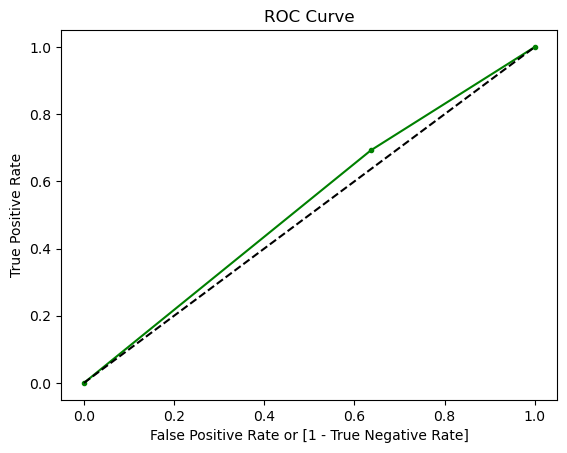

In [ ]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.',color='Green')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



#  Interpretation:
Interpret the coefficients of the logistic regression model.


In [ ]:
# Model coefficients
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': Logistic_regression.coef_[0]})
print(coefficients)

# Discuss significance
print("The coefficients represent the log odds of survival for a unit increase in the corresponding feature.")

    Feature  Coefficient
0    Pclass    -0.416179
1       Sex    -2.375795
2       Age    -0.050512
3     SibSp     0.293848
4     Parch    -0.401067
5      Fare    -0.000122
6  Embarked    -0.216337
The coefficients represent the log odds of survival for a unit increase in the corresponding feature.


# Discuss the significance of features in predicting the target variable (survival probability in this case)
 .1class (Passenger Class):

Coefficient: Generally, higher passenger classes (e.g., 1st class) have positive coefficients, suggesting higher survival probabilities for 1st class passengers compared to 3rd class.

Significance: Historical data and analyses show that 1st class passengers had higher survival rates compared to 2nd and 3rd class passengers.

2.Age:

Coefficient: The coefficient for age can vary. If negative, it suggests that older passengers had a lower survival probability.

Significance: In practice, children and younger individuals often had higher survival rates, possibly due to lifeboat allocations and other factors.

3.SibSp (Number of Siblings/Spouses Aboard):

Coefficient: This feature’s coefficient can indicate whether having more family members aboard increased or decreased survival probability.

Significance: Having family aboard might have affected survival rates due to family members potentially helping each other, but this effect could be complex.

4.Parch (Number of Parents/Children Aboard):

Coefficient: Similar to SibSp, this feature’s coefficient can indicate the impact of having parents or children on survival.

Significance: Having dependent family members might have influenced survival chances, particularly if lifeboats were prioritized for families.

5.Fare:

Coefficient: A higher fare often corresponds to a higher survival probability due to better accommodations and possibly higher prioritization in lifeboat access.

Significance: Passengers who could afford higher fares were more likely to be in better cabins and possibly in more favorable positions to survive.

# Interview Questions:
1. What is the difference between precision and recall?

Precision and Recall are two important metrics used to evaluate the performance of classification models, particularly in binary classification:

Precision (also known as Positive Predictive Value): This measures the accuracy of the positive predictions. It is defined as the ratio of true positive predictions to the total positive predictions (true positives + false positives): [ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} ] Usefulness: High precision indicates that when the model predicts a positive class, it is very likely to be correct. This is crucial in scenarios where false positives are costl.

Recall (also known as Sensitivity or True Positive Rate): This measures the model's ability to identify all relevant positive cases. It is defined as the ratio of true positives to the total actual positives (true positives + false negatives): [ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} ] Usefulness: High recall indicates that the model is good at capturing all positive instances. This is especially important in situations where missing a positive case is critical (e.g., disease detection).


# 2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a statistical method used to evaluate the performance of a model by partitioning the data into subsets, training the model on some subsets, and validating it on others. The most common type is k-fold cross-validation:

The dataset is divided into k subsets (or folds).
The model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, with each fold used as the validation set once.
Importance of Cross-Validation in Binary Classification:

Generalization: It helps assess how well the model generalizes to an independent dataset. This is crucial to avoid overfitting, where the model performs well on training data but poorly on unseen data.

Performance Stability: Cross-validation provides a more robust estimate of model performance by averaging the results across multiple folds, reducing the variance associated with a single train-test split.

Hyperparameter Tuning: It is often used during hyperparameter tuning to select the best parameters for the model, ensuring that the chosen model performs well on various subsets of data.

Data Utilization: It allows for efficient use of the dataset, particularly when data is limited, as every data point is used for both training and validation.